In [11]:
import warnings
warnings.filterwarnings("ignore")
# Wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Exploring
import scipy.stats as stats

In [9]:
df = sns.load_dataset('tips')

In [35]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
train, test = train_test_split(df, random_state=123)

In [13]:
scaler = MinMaxScaler()
train[['total_bill','tip']] = scaler.fit_transform(train[['total_bill','tip']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a903f10>,
      dtype=object)

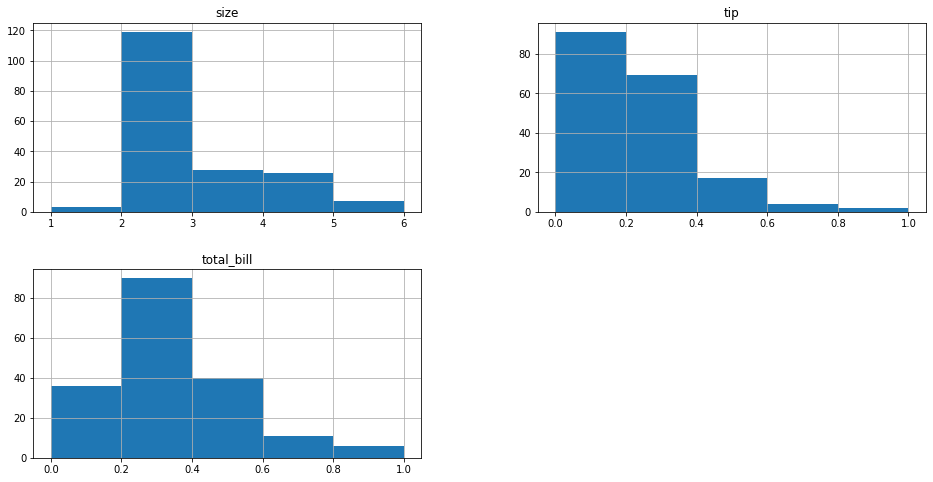

In [16]:
train.hist(figsize=(16, 8), bins=5, log=False)

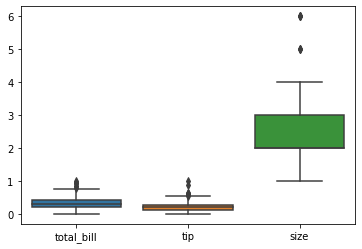

In [17]:
sns.boxplot(data=train)

### Pearson's correlation coefficient test

𝐻0 : There is no linear correlation between tip and total bill

𝐻𝑎:  There is a linear correlation between tip and total bill

In [19]:
# set alpha value to .01
alpha = .01 
r, p = stats.pearsonr(train.tip, train.total_bill)

if p < alpha:
    print("Reject the null hypothesis")

else:
    print("Fail to reject our null hypothesis")

print("R is", r)
print("p is", p)

Reject the null hypothesis
R is 0.6698078756495196
p is 3.4945155733570463e-25


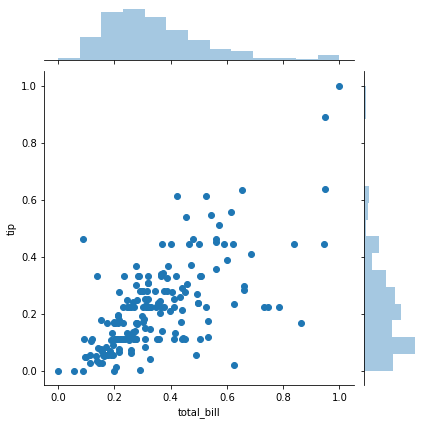

In [20]:
sns.jointplot(data=train, x='total_bill', y='tip')

### T_Test for Tip amount vs gender
𝐻0 : there is no difference in tip amount between customers who are male and female

𝐻𝑎 : there is a difference in tip amount between customers who are male and female

In [27]:
alpha = 0.01
x1 = train[train.sex == 'Male'].tip
x2 = train[train.sex == 'Female'].tip

In [28]:
tstat, p = stats.ttest_ind(x1, x2)
tstat, p 

(1.358004996180471, 0.17615252101860387)

In [30]:
if p < alpha:
    print("Reject the null hypothesis")

else:
    print("Fail to reject the null hypothesis")

print("tstat is", tstat)
print("p is", p)

Fail to reject the null hypothesis
tstat is 1.358004996180471
p is 0.17615252101860387


### T_Test for Tip amount vs smoker
𝐻0 : there is no difference in tip amount between customers who are smoker and who are not smoker.

𝐻𝑎 : there is a difference in tip amount between customers who are smoker and who are not smoker.


In [36]:
alpha = 0.01
x1 = train[train.smoker == 'Yes'].tip
x2 = train[train.smoker == 'No'].tip

In [37]:
tstat, p = stats.ttest_ind(x1, x2)
tstat, p 

(0.2948726912354823, 0.7684290759706709)

In [38]:
if p < alpha:
    print("Reject the null hypothesis")

else:
    print("Fail to reject the null hypothesis")

print("tstat is", tstat)
print("p is", p)

Fail to reject the null hypothesis
tstat is 0.2948726912354823
p is 0.7684290759706709


### T_Test for Tip amount vs eating time
𝐻0 : there is no difference in tip amount between customers who have lunch and who have dinner.

𝐻𝑎 : there is a difference in tip amount between customers who have lunch and who have dinner.

In [42]:
alpha = 0.01
x1 = train[train.time == 'Dinner'].tip
x2 = train[train.time == 'Lunch'].tip

In [43]:
tstat, p = stats.ttest_ind(x1, x2)
tstat, p 

(1.3405694027233281, 0.1817404411773059)

In [44]:
if p < alpha:
    print("Reject the null hypothesis")

else:
    print("Fail to reject the null hypothesis")

print("tstat is", tstat)
print("p is", p)

Fail to reject the null hypothesis
tstat is 1.3405694027233281
p is 0.1817404411773059


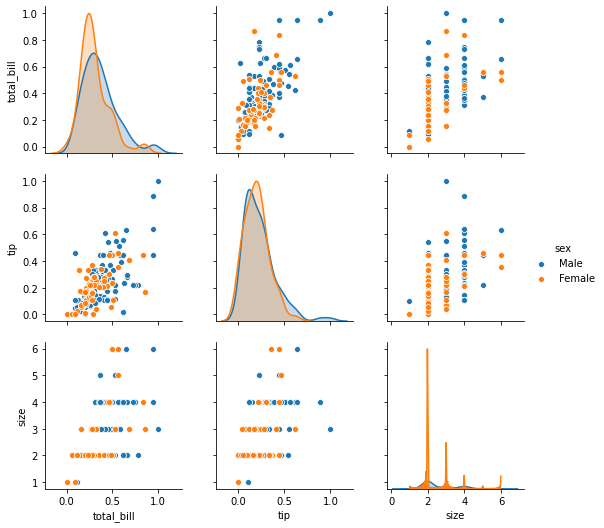

In [45]:
sns.pairplot(train, hue='sex')

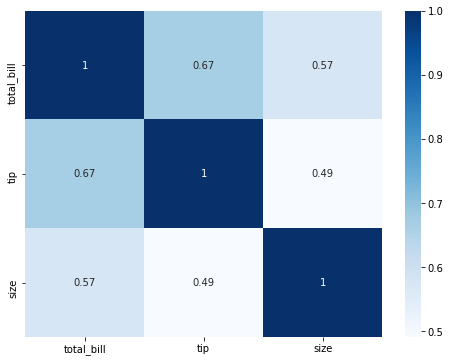

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

### Chi squared test

$H_0$: Customers' eating time and custmoers' gender are independent of each other.

$H_a$: Customers' eating time and custmoers' gender are dependent of each other.

In [49]:
observed = pd.crosstab(train.time, train.sex)
observed

sex,Male,Female
time,,
Lunch,22,25
Dinner,96,40


In [55]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.005782313058901859

In [51]:
alpha = 0.01

In [54]:
if p < alpha:
    print("Reject the null hypothesis")

else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


𝐻0 : Customers who are smoker and custmoers' gender are independent of each other.

𝐻𝑎: Customers' who are smoker and custmoers' gender are dependent of each other.

In [59]:
observed = pd.crosstab(train.smoker, train.sex)
observed

sex,Male,Female
smoker,,
Yes,43,27
No,75,38


In [60]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.6029524830649453

In [61]:
if p < alpha:
    print("Reject the null hypothesis")

else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis
